In [44]:
from tensorflow.keras.applications import VGG19,imagenet_utils
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
import matplotlib.pyplot as plt
import numpy as np

In [45]:
model=VGG19(
    weights="imagenet",
    classifier_activation="softmax",
)

In [49]:
img_path = 'images/cat1.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

features = model.predict(x)
results=imagenet_utils.decode_predictions(features)

In [50]:
results

[[('n02124075', 'Egyptian_cat', 0.44328976),
  ('n02123045', 'tabby', 0.23763505),
  ('n02123159', 'tiger_cat', 0.11505887),
  ('n04589890', 'window_screen', 0.022675566),
  ('n03598930', 'jigsaw_puzzle', 0.015577169)]]

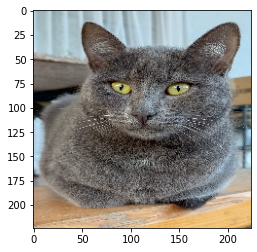

In [31]:
im = cv2.imread('images/cat1.jpg')
im_resized = cv2.resize(im, (224, 224), interpolation=cv2.INTER_LINEAR)

plt.imshow(cv2.cvtColor(im_resized, cv2.COLOR_BGR2RGB))
plt.show()

In [34]:
model.predict(im_resized)

ValueError: in user code:

    C:\Users\Emre\anaconda3\envs\tf_gpu\lib\site-packages\keras\engine\training.py:1586 predict_function  *
        return step_function(self, iterator)
    C:\Users\Emre\anaconda3\envs\tf_gpu\lib\site-packages\keras\engine\training.py:1576 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\Emre\anaconda3\envs\tf_gpu\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1286 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\Emre\anaconda3\envs\tf_gpu\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2849 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\Emre\anaconda3\envs\tf_gpu\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:3632 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\Emre\anaconda3\envs\tf_gpu\lib\site-packages\keras\engine\training.py:1569 run_step  **
        outputs = model.predict_step(data)
    C:\Users\Emre\anaconda3\envs\tf_gpu\lib\site-packages\keras\engine\training.py:1537 predict_step
        return self(x, training=False)
    C:\Users\Emre\anaconda3\envs\tf_gpu\lib\site-packages\keras\engine\base_layer.py:1020 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    C:\Users\Emre\anaconda3\envs\tf_gpu\lib\site-packages\keras\engine\input_spec.py:266 assert_input_compatibility
        raise ValueError('Input ' + str(input_index) +

    ValueError: Input 0 is incompatible with layer vgg19: expected shape=(None, 224, 224, 3), found shape=(32, 224, 3)
